# Calibration Notebook
> Guan, Shenheng, Michael F. Moran, et Bin Ma. « Prediction of LC-MS/MS Properties of Peptides from Sequence by Deep Learning ». Molecular & Cellular Proteomics : MCP 18, no 10 (octobre 2019): 2099‑2107. https://doi.org/10.1074/mcp.TIR119.001412.

In [2]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import random
from pyteomics import mass
from pyteomics import electrochem

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error

import joblib


In [3]:
__path_model__ = r"D:\Utilisateurs\pelegrin\dev\pred\zfit_bidirLSTM2_masking_model.h5"
__DATA_1_PATH__ = r"D:\Utilisateurs\pelegrin\dev\pred\dic.pkl"
__DATA_2_PATH__ = r"D:\Utilisateurs\pelegrin\dev\pred\Quantified_peptide_ions.tsv"

### Our data

In [4]:
dic = joblib.load(__DATA_1_PATH__)

def generate_data(dic):
    charge = []
    seq = []

    for i in dic.keys():
        for j in dic[i].keys():
            if j != 'total':
                charge.append(str(j))
                seq.append(dic[i][j]['sequence'])
    return np.array(seq),np.array(charge)

seq,charge = generate_data(dic)
print(len(seq),len(charge))

names = ''' peptide_id	sequence	modifications	master_elution_time	master_quant_peptide_ion_moz	master_quant_peptide_ion_charge	master_quant_peptide_ion_elution_time	master_quant_peptide_ion_feature_id	psm_count_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72878	psm_count_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72882	psm_count_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72898	psm_count_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72904	psm_count_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72907	psm_count_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72911	psm_count_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73324	psm_count_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73334	psm_count_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73344	psm_count_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73495	psm_count_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73500	psm_count_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73578	psm_count_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73592	psm_count_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73599	psm_count_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73622	psm_count_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73631	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72878	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72882	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72898	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72904	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72907	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72911	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73324	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73334	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73344	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73495	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73500	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73578	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73592	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73599	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73622	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73631	corrected_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72878	corrected_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72882	corrected_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72898	corrected_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72904	corrected_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72907	corrected_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72911	corrected_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73324	corrected_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73334	corrected_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73344	corrected_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73495	corrected_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73500	corrected_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73578	corrected_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73592	corrected_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73599	corrected_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73622	corrected_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73631	raw_abundance_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72878	raw_abundance_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72882	raw_abundance_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72898	raw_abundance_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72904	raw_abundance_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72907	raw_abundance_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72911	raw_abundance_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73324	raw_abundance_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73334	raw_abundance_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73344	raw_abundance_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73495	raw_abundance_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73500	raw_abundance_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73578	raw_abundance_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73592	raw_abundance_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73599	raw_abundance_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73622	raw_abundance_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73631'''

elution_time_new_file = '''elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72878	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72882	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72898	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72904	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72907	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72911	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73324	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73334	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73344	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73495	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73500	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73578	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73592	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73599	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73622	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73631'''

# elution_time_new_file = elution_time_new_file.replace(' ','_')
# elution_time_new_file = elution_time_new_file.replace('-','_')
elution_time_new_file = elution_time_new_file.split('\t')


labels = '''elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72878	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72882	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72898	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72904	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72907	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_72911	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73324	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73334	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73344	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73495	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73500	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73578	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73592	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73599	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73622	elution_time_MC HeLa Thermo MS60K-HCD15KG120 1ug ON 45C_73631	'''
labels = labels.replace('\t','_labels\t')
# labels = labels.replace('-','_')
# labels = labels.replace(' ','_')
labels = labels.split('\t')

df = pd.read_table(__DATA_2_PATH__, sep='\t', names=names.split('\t'))
df = df[1:]
df.head()

ions = np.array(df['master_quant_peptide_ion_charge'].values)
ions = np.concatenate((ions,charge))

seq1 = np.array(df['sequence'].values)
seq = np.concatenate((seq1,seq))

data = pd.DataFrame(list(zip(seq, ions)),
               columns =['seq', 'charge'])
print(data.shape)
data.head()

56571 56571
(121277, 2)


C:\Users\pelegrin\AppData\Local\Temp\2\ipykernel_13104\4150674683.py:32: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(__DATA_2_PATH__, sep='\t', names=names.split('\t'))


,seq,charge
0,GPQVALK,2
1,GPALDIK,2
2,FSVSGLK,2
3,APSLDIK,2
4,GPEVDIK,2


In [5]:
data['seq'].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
121272     True
121273    False
121274     True
121275    False
121276    False
Name: seq, Length: 121277, dtype: bool

In [6]:
data.iloc[121274]

seq       EIAQEFKTDLR
charge              3
Name: 121274, dtype: object

In [7]:
data[data['seq']=='EIAQEFKTDLR']

,seq,charge
121273,EIAQEFKTDLR,2
121274,EIAQEFKTDLR,3


### One Hot modified functions 

In [8]:
##Prediction of LCMSMS properties of peptides from sequence by deep learning
##Shenheng Guan1, Michael F. Moran, and Bin Ma
##2019-02-21

## MODIFIED BY JAVIER PELEGRIN GARCIA
##2023-07-28

import numpy as np



class InvalidPeptideLength(Exception):
    "Error peptide is too long."
    pass

class InvalidCharge(Exception):
    "Error charge is invalid."
    pass


psi_to_single_ptm = {'(Acetyl)-': 'B',
                     '(Carbamyl)': 'O',
                     '(Carbamidomethyl)': '',
                     'M(Oxidation)': 'J',
                     '(Gln->pyro-Glu)Q': 'X',
                     'N(Deamidated)': 'D',
                     'Q(Deamidated)': 'E'}

def reshapeOneHot(X):
    X = np.dstack(X)
    X = np.swapaxes(X, 1, 2)
    X = np.swapaxes(X, 0, 1)
    return X

def get_single_ptm_code(psi_sequence):
    sequence = psi_sequence
    for ptm in psi_to_single_ptm:
        sequence = sequence.replace(ptm, psi_to_single_ptm[ptm])
    return sequence

def one_hot_encode_peptide(psi_sequence, MAX_LENGTH = 41):
    peptide = get_single_ptm_code(psi_sequence)
    if len(peptide) > MAX_LENGTH:
        # print('Peptide length is larger than maximal length of ', str(MAX_LENGTH))
        raise InvalidPeptideLength
    else:
        AA_vocabulary = 'KRPTNAQVSGILCMJHFYWEDBXOU'#B: acetyl; O: Carbamyl; J: oxidized Met; X:pyro_glu
        no_not_used_aas = 2#U: not used

        one_hot_peptide = np.zeros((len(peptide), len(AA_vocabulary) - no_not_used_aas))

        # print(one_hot_peptide.shape,(len(peptide), len(AA_vocabulary) - no_not_used_aas))

        for j in range(0, len(peptide)):
            try:
                aa = peptide[j]
                one_hot_peptide[j, AA_vocabulary.index(aa)] = 1
            except:
                pass
        
        no_front_paddings = int((MAX_LENGTH - len(peptide))/2)
        peptide_front_paddings = np.zeros((no_front_paddings, one_hot_peptide.shape[1]))

        no_back_paddings = MAX_LENGTH - len(peptide) - no_front_paddings
        peptide_back_paddings = np.zeros((no_back_paddings, one_hot_peptide.shape[1]))

        full_one_hot_peptide = np.vstack((peptide_front_paddings, one_hot_peptide, peptide_back_paddings))

        return peptide, full_one_hot_peptide
    
def one_hot_encode_peptide_ion(psi_sequence, charge, MAX_LENGTH = 41, MAX_CHARGE = 6):

    if len(psi_sequence) >= MAX_CHARGE:
        raise InvalidPeptideLength

    peptide, full_one_hot_peptide = one_hot_encode_peptide(psi_sequence)
    
    one_hot_charge = np.zeros((len(peptide), MAX_CHARGE))
    one_hot_charge[:, charge - 1] = 1
    
    no_front_paddings = int((MAX_LENGTH - len(peptide))/2)
    charge_front_paddings = np.zeros((no_front_paddings, one_hot_charge.shape[1]))

    no_back_paddings = MAX_LENGTH - len(peptide) - no_front_paddings
    charge_back_paddings = np.zeros((no_back_paddings, one_hot_charge.shape[1]))

    full_one_hot_charge = np.vstack((charge_front_paddings, one_hot_charge, charge_back_paddings))

    full_one_hot_peptide_ion = np.hstack((full_one_hot_peptide, full_one_hot_charge))

    return full_one_hot_peptide_ion


def on_hot_encode_charge(charge,MAX_CHARGE = 5):
    if charge > MAX_CHARGE:
        raise InvalidCharge
    one_hot_charge = np.zeros((1, MAX_CHARGE))
    one_hot_charge[:, charge - 1] = 1
    return one_hot_charge

In [9]:
def pass_to_EncyclopeDIA_style(seq,mod):
    DIA = {
        "Carbamidomethyl" : ( "+57.021464", ("C")),
        "Oxidation": ("+15.99491" ,("M")),
        "Phosphorylation": ("+79.966331" ,("S", "T", "Y")),
        "Acetyl": ("+42.010565" ,("K", "N-term")),
        "Succinylation": ("+101.023869" ,("K")),
        "Ubiquitylation": ("+114.042927" ,("K")),
        "Mono-methylation": ("+14.015650" ,("K", "R")),
        "Di-methylation": ("+28.031300" ,("K", "R")),
        "Tri-methylation": ("+42.046950" ,("K")),
        "TMT0": ("+224.152478" ,("K", "N-term")),
        "TMT10": ("+229.162932" ,("K", "N-term")),
        "Pyroglutamate": ("-18.010565" ,("N-term E")),
        "Pyroglutamate": ("-17.026549" ,("N-term","Q")),
        "Cyclized S-CAM-Cys": ("+39.994915" ,("N-term", "C"))
    }
    mod = mod.split("|")
    
    new_seq = ""
    while len(mod) > 0:
        n = int(mod.pop(0))
        new_seq = f"{new_seq}{seq[:n]}[{DIA[mod.pop(0)][0]}]"
        seq = seq[n:]
    return f"{new_seq}{seq}"

In [10]:
class differentlenght(Exception):
    "List have differents length"
    pass

def normalize_data(list_seq, list_charge):
    occ = 0
    label, one_hot = [], []
    if len(list_seq) != len(list_charge):
        print(f"list of seq: {len(list_seq)} and list of charge: {len(list_charge)} have differents length.")
        raise differentlenght
    for seq,charge in zip(list_seq,list_charge):
        try:
            one_hot.append(one_hot_encode_peptide(seq)[1])
            label.append(on_hot_encode_charge(charge))
        except InvalidPeptideLength:
            print(f"peptide {seq} with length = {len(seq)} is too long, Max length is 41")
            occ+=1
            pass
        except InvalidCharge:
            print(f"peptide {seq} with charge = {charge} is invalid")
            one_hot.pop()
            pass
    print(f"peptides bigger than 41 = {occ}")
    return np.array(one_hot),np.array(label)

In [11]:
charge = []
for i in data['charge'].values:
    if type(i) == str: 
        i = eval(i)
    charge.append(i)


print(charge)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 4, 2, 3, 2, 4, 3, 2, 4, 3, 2, 3, 4, 2, 2, 3, 2, 3, 2, 3, 4, 4, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 4, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 4, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 4, 2, 2, 2, 2, 2, 

#### Normalize data

In [12]:
X,y = normalize_data( data['seq'].values, charge)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

peptide VGEPGHGGDPGLVSAYGAGLEGGVTGNPAEFVVNTSNAGAGALSVTIDGPSK with length = 52 is too long, Max length is 41
peptide PNTPVLMCSVPGYDASGHVEDLAAEQNTQITSIAIGSAEGFNQADK with length = 46 is too long, Max length is 41
peptide DADDNCVTVCNMENVDAMGVHTGDSVVVAPAQTLSNAEFQMLR with length = 43 is too long, Max length is 41
peptide GHMPPLTSAQQALTGTINSSMQAVQAAQATLDDFDTLPPLGQDAASK with length = 47 is too long, Max length is 41
peptide TAPSTNSSAPAVVGNPGVTEVSPEFLAALPPAIQEEVLAQQR with length = 42 is too long, Max length is 41
peptide EIDVDAVASDGVVAAIAISEHVENAGVHSGDATLVTPPQDITAK with length = 44 is too long, Max length is 41
peptide VVETDPSPYCIVAPDTVIHCEGEPIKREDEEESLNEVGYDDIGGCR with length = 46 is too long, Max length is 41
peptide SEEVPAFGVASPPPLTDTPDTTANAEGDLPTTMGGPLPPHLALK with length = 44 is too long, Max length is 41
peptide SEEVPAFGVASPPPLTDTPDTTANAEGDLPTTMGGPLPPHLALK with length = 44 is too long, Max length is 41
peptide QNQVGVVPWSPPQSNWNPWTSSNIDEGPLAFATPEQISMDLK with length = 42 is too long, Max len

In [13]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')
tf.config.list_physical_devices()
tf.debugging.set_log_device_placement(True)


Num GPUs Available:  1


In [14]:
tf.debugging.set_log_device_placement(True)

# Place tensors on the CPU
with tf.device('/GPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Run on the GPU
c = tf.matmul(a, b)
print(c)


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [15]:

print('Total corpus size')
print('\t• train :', len(X_train), 'exemples')
print('\t• test :', len(X_test), 'exemples')

# Affichage de la taille des images et des labels dans le corpus 
print('\nTraining data size')
print('\t• X_train (masse,residues,charge):', X_train.shape)
print('\t• y_train (labels) :', y_train.shape)

print('\nTest data size')
print('\t• X_test (masse,residues,charge) :', X_test.shape)
print('\t• y_test (labels) :', y_test.shape)

Total corpus size
	• train : 81171 exemples
	• test : 39980 exemples

Training data size
	• X_train (masse,residues,charge): (81171, 41, 23)
	• y_train (labels) : (81171, 1, 5)

Test data size
	• X_test (masse,residues,charge) : (39980, 41, 23)
	• y_test (labels) : (39980, 1, 5)


In [16]:
tf.__version__

'2.10.0'

#### Load the model from keras

In [27]:
import keras
from keras.models import load_model
from keras.models import Model
from keras import layers
from keras.layers import Dense,GlobalAveragePooling2D

base_model = load_model(__path_model__)

# base_model= base_model(IncludeTop=False)

# Freeze the base_model
x=base_model.output
layers.Masking(mask_value=0., input_shape=(None, X_train.shape[2]))(x)
# x=layers.Bidirectional()(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
# x=Dense(1024,activation='relu')(x) #dense layer 3
# x=Dense(1024,activation='relu')(x) #dense layer 3
# # x=layers.Bidirectional()(x) #dense layer 2
x=Dense(256,activation='tanh')(x) #dense layer 3
preds=Dense(5,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=preds)


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing o

In [28]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [29]:
model.compile(optimizer='adam', loss='MeanSquaredLogarithmicError')

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [30]:

with tf.device('/GPU:0'):
	history = model.fit(X_train, 
				y_train, 
				epochs=10, # TODO: set 150 for final model  # More epochs because more data
				batch_size=512,
				validation_split=0.2)

	cost = model.evaluate(X_test, y_test, batch_size=512)
	print('test cost:', cost)
from keras.models import load_model
model.save("Model_one_hot_calibration_my_data.h5")

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Opt

In [31]:
print('test cost:', cost)
print("X_test", X_test)

test cost: 0.0808001458644867
X_test [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
 

Start predictions with test data

In [32]:
from keras.models import load_model

#model = load_model("Model_one_hot_calibration_my_data.h5")
# model = load_model(__path_model__)

model.summary()

print("trainable_weights:", len(model.trainable_weights))
print("non_trainable_weights:", len(model.non_trainable_weights))



Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_1_input (InputLayer  [(None, None, 23)]       0         
 )                                                               
                                                                 
 masking_1 (Masking)         (None, None, 23)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 512)        573440    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 512)              1574912   
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                           

In [33]:
predict_charge = []
with tf.device('/GPU:0'):
    predict_charge = model.predict(X_test)
    print(predict_charge[0])
    print(predict_charge)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op 

[0.19304761 0.19211186 0.18790331 0.21949872 0.20743848]
RMSE: 1.9690196848329449


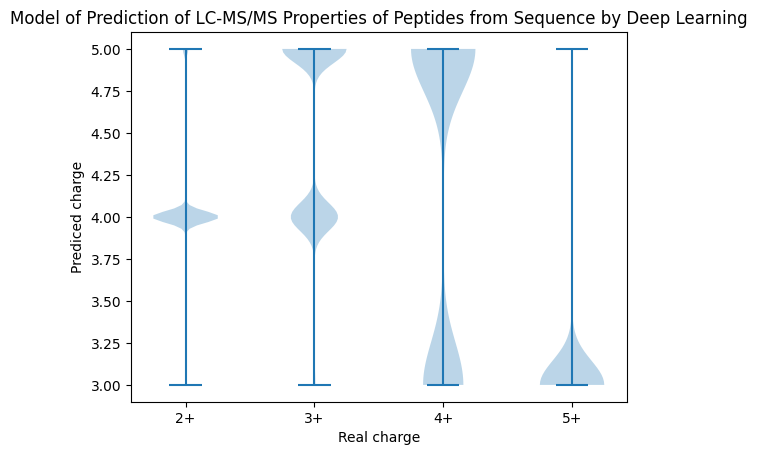

In [34]:
f = lambda x : np.argmax(x)+1
print(predict_charge[0])
predict_y = np.array(list(map(f,predict_charge)))

charge_y = np.array(list(map(f,y_test)))

y_pred = [[],[],[],[]]
for pred,real in zip(predict_y,charge_y):
    y_pred[real-2].append(pred)

# print(y_pred)
print(f'RMSE: {mean_squared_error(charge_y, predict_y, squared=False)}')
plt.violinplot(y_pred)
plt.xticks([1,2,3,4],['2+','3+','4+','5+'])
plt.xlabel('Real charge')
plt.ylabel('Prediced charge')
plt.title('Model of Prediction of LC-MS/MS Properties of Peptides from Sequence by Deep Learning')
plt.show()